#Predicción de Precios de Autos Usados



##- Objetivo:
 Contruir un modelo de Machine Learning de Regresión para predecir el precio de venta de vehículos usados, nos basaremos en sus caracterísiticas técnicas y estado de estos.


##- Pasos:
1- Importación de Librerias: Cargar librerias y datos a utilizar.

2- Hipótesis: Plantear lo que esperamos de los datos.

3-  Análisis Exploratorio de Datos(EDA): Entender las variables y preparar los datos.

4- Feature Engineering: Crear nuevas variables útiles.

5- Procesamiento: Usar One Hot Encoding(OHE) para la transformación de datos.

6- División de Datos: Entrenamiento del Random Forest Regressor.

7- Evaluación: Medición de métricas (R² y MAE)

8- Conclusión: Evaluación del modelo.

##1- Importación de Librerías y Carga de Datos.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv('Used_Car_Price_Prediction01.csv', encoding='latin1', sep= ';')
print(f"Dataset cargado. Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

Dataset cargado. Filas: 7400, Columnas: 28


In [5]:
# configuramos lo visual para entender con mas facilidad los gráficos

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [6]:
df.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,car_availability,total_owners,broker_quote,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,in_stock,2,397677,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,in_stock,1,272935,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,...,in_stock,1,469605,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,in_stock,1,294262,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,in_stock,1,360716,great,2021-04-01T13:33:40.733,True,8397,54225,False,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             7400 non-null   object
 1   yr_mfr               7400 non-null   int64 
 2   fuel_type            7400 non-null   object
 3   kms_run              7400 non-null   int64 
 4   sale_price           7400 non-null   int64 
 5   city                 7400 non-null   object
 6   times_viewed         7400 non-null   int64 
 7   body_type            7297 non-null   object
 8   transmission         6844 non-null   object
 9   variant              7400 non-null   object
 10  assured_buy          7400 non-null   bool  
 11  registered_city      7390 non-null   object
 12  registered_state     7390 non-null   object
 13  is_hot               7400 non-null   bool  
 14  rto                  7400 non-null   object
 15  source               7274 non-null   object
 16  make  

In [8]:
df.describe()

,yr_mfr,kms_run,sale_price,times_viewed,total_owners,broker_quote,emi_starts_from,booking_down_pymnt
count,7400.000000,7400.000000,7.400000e+03,7400.000000,7400.000000,7.400000e+03,7400.000000,7400.000000
mean,2013.885676,62624.520000,4.548892e+05,1550.706081,1.327297,4.322044e+05,10565.942027,68233.529054
std,3.087613,43532.042371,2.827023e+05,2080.952842,0.579798,2.880316e+05,6566.468434,42405.389468
min,1996.000000,60.000000,0.000000e+00,3.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,2012.000000,31885.250000,2.811740e+05,554.750000,1.000000,2.526612e+05,6531.250000,42176.250000
50%,2014.000000,55765.000000,3.824490e+05,1088.000000,1.000000,3.611445e+05,8883.000000,57367.500000
75%,2016.000000,84184.000000,5.401490e+05,1926.500000,2.000000,5.260180e+05,12546.250000,81022.500000
max,2021.000000,996609.000000,3.866000e+06,61930.000000,6.000000,3.250000e+06,89798.000000,579901.000000


##2- Hipótesis



Hipotesis Nula(H0): Las características de los autos no nos ayudan significativamente a predecir el precio.

Hipotesis Alternativa (H1):Es posible construir un modelo de regresión (Random Forest Regressor) utilizando las características del dataset que prediga el valor del Auto con un coeficiente de determinación (R²) significativamente superior 0.80 y el MAE más bajo posible para el dataset.

##3- Analisis Exploratorio de Datos (EDA):

In [11]:
#Seleccionaremos las columnas con mayor valor de análisis, desechamos las restantes por su alta cardinalidad con la funcion "nunique()"
#y otras porque por lógica no aportan información relevante, como ser registered_state, rto, y usamos boxplots para source e is_hot,
#lo cual nos mostró q no tenian información relevante que afectara a nuestra target
columns_to_check = ['yr_mfr', 'kms_run', 'fuel_type', 'transmission', 'city', 'sale_price', 'make', 'model', 'broker_quote']
df_work = df[columns_to_check].copy()

In [10]:
# Observamos la cantidad de nulos
null_counts = df.isnull().sum()
show_nulls = null_counts[null_counts > 0]
print(show_nulls)

body_type              103
transmission           556
registered_city         10
registered_state        10
source                 126
car_availability       620
car_rating               9
ad_created_on            1
fitness_certificate      8
dtype: int64


In [12]:
#Procedemos a eliminar los nulos al usar el método de relleno descubrimos
#que el MAE nos da un resultado de 0.38, una predicción muy erronea, y al eliminarlos reducimos ese valor.
df_cleaned = df_work.dropna().reset_index(drop=True)
display(df_cleaned.head())
df_cleaned.info()

,yr_mfr,kms_run,fuel_type,transmission,city,sale_price,make,model,broker_quote
0,2015,8063,petrol,manual,noida,386399,maruti,swift,397677
1,2016,23104,petrol,manual,noida,265499,maruti,alto 800,272935
2,2017,23402,petrol,manual,noida,477699,hyundai,grand i10,469605
3,2013,39124,diesel,manual,noida,307999,maruti,swift,294262
4,2015,22116,petrol,manual,noida,361499,hyundai,grand i10,360716


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6844 entries, 0 to 6843
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   yr_mfr        6844 non-null   int64 
 1   kms_run       6844 non-null   int64 
 2   fuel_type     6844 non-null   object
 3   transmission  6844 non-null   object
 4   city          6844 non-null   object
 5   sale_price    6844 non-null   int64 
 6   make          6844 non-null   object
 7   model         6844 non-null   object
 8   broker_quote  6844 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 481.3+ KB


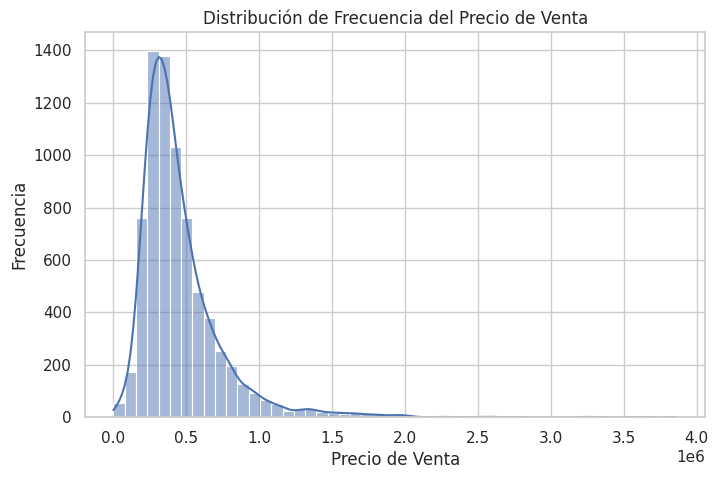

In [14]:
#Procedemos a crear un Histograma el cual nos va a mostrar la distribución del precio
plt.figure(figsize=(8, 5))
sns.histplot(df['sale_price'].dropna(), kde=True, bins=50)
plt.title('Distribución de Frecuencia del Precio de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

Análisis Visual Detallado


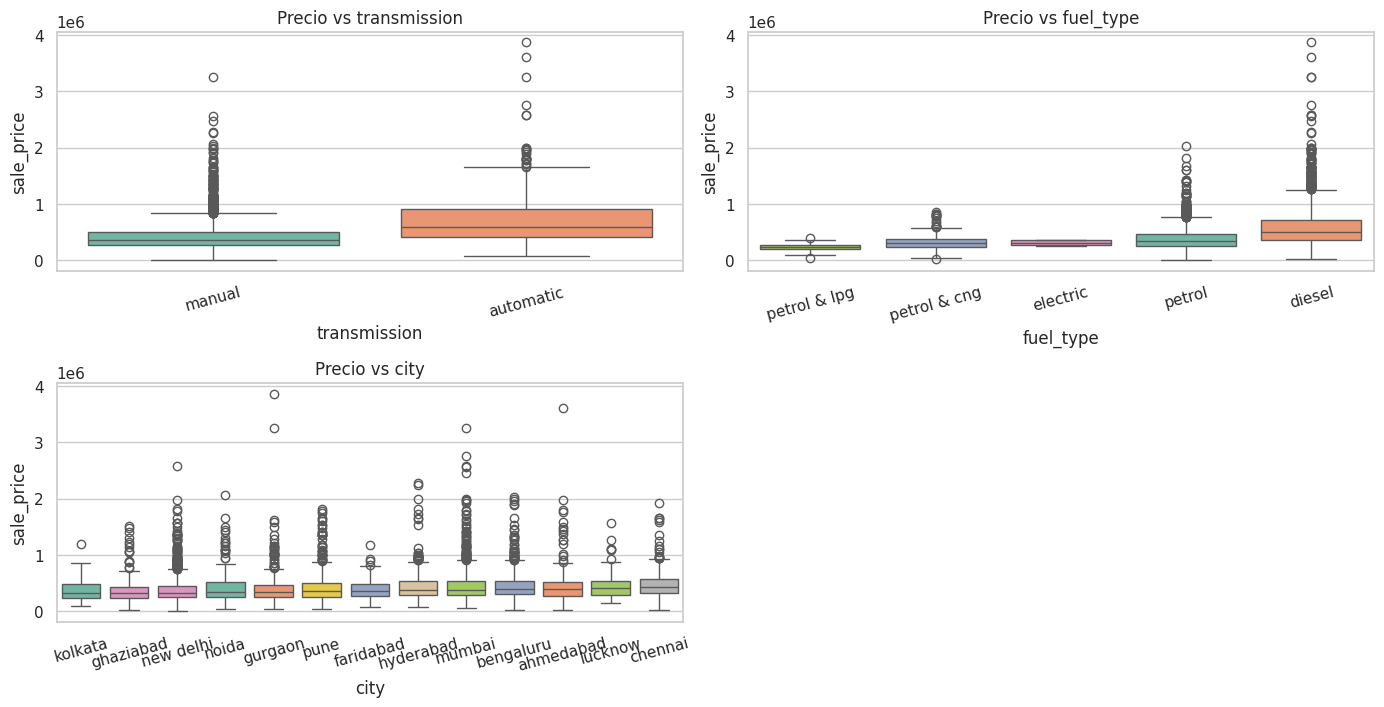

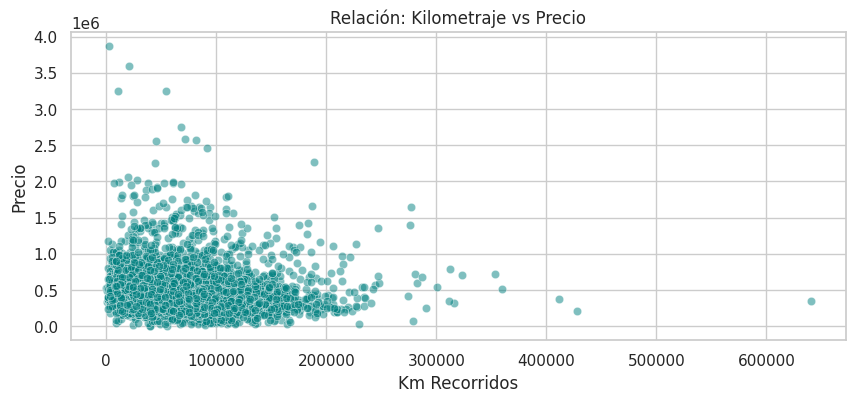

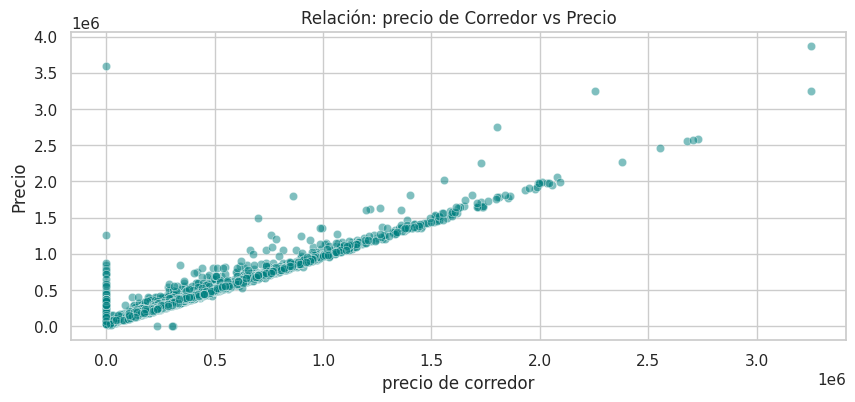

In [15]:
print("Análisis Visual Detallado")

# Boxplots para Categóricas Clave
categorical_vars = ['transmission', 'fuel_type', 'city']
plt.figure(figsize=(14, 10))
for i, var in enumerate(categorical_vars):
    plt.subplot(3, 2, i + 1)
    order = df_cleaned.groupby(var)['sale_price'].median().sort_values().index
    sns.boxplot(data=df_cleaned, x=var, y='sale_price', order=order, palette='Set2', hue=var, legend=False)
    plt.title(f'Precio vs {var}')
    plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Scatterplots para Numéricas
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df_cleaned, x='kms_run', y='sale_price', alpha=0.5, color='teal')
plt.title('Relación: Kilometraje vs Precio')
plt.xlabel('Km Recorridos')
plt.ylabel('Precio')
plt.show()
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df_cleaned, x='broker_quote', y='sale_price', alpha=0.5, color='teal')
plt.title('Relación: precio de Corredor vs Precio')
plt.xlabel('precio de corredor')
plt.ylabel('Precio')
plt.show()

In [16]:
#Procedemos a limpiar las columnas Make y Price
df_clean_make = df.dropna(subset=['make', 'sale_price']).copy()

In [17]:
#Calculamos el precio promedio por Marca y el top 10
avg_price_by_make = df_clean_make.groupby('make')['sale_price'].mean().sort_values(ascending=False)
top_10_makes = df_clean_make['make'].value_counts().nlargest(10).index

In [18]:
#Filtrar el DataFrame solo con los Top 10 marcas
df_top_10 = df_clean_make[df_clean_make['make'].isin(top_10_makes)]
#calculamos el precio promedio de estas top 10
avg_price_by_make = df_top_10.groupby('make')['sale_price'].mean().sort_values(ascending=False).reset_index()

/tmp/ipython-input-472367816.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='make', y='sale_price', data=avg_price_by_make, palette='viridis')


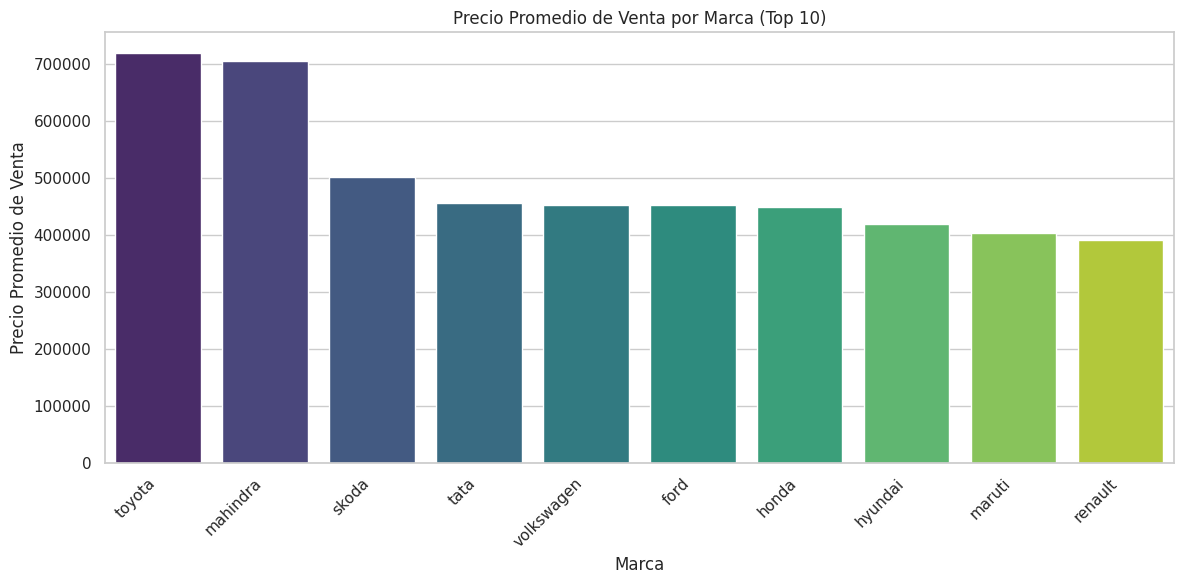

In [19]:
#hacemos un gráfico de barras de Marca
plt.figure(figsize=(12, 6))
sns.barplot(x='make', y='sale_price', data=avg_price_by_make, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Precio Promedio de Venta por Marca (Top 10)')
plt.ylabel('Precio Promedio de Venta')
plt.xlabel('Marca')
plt.tight_layout()
plt.show()

In [20]:
#Calculamos el precio promedio por Modelo y el top 10
avg_price_by_model = df_clean_make.groupby('model')['sale_price'].mean().sort_values(ascending=False)
top_10_model = df_clean_make['model'].value_counts().nlargest(10).index

In [21]:
#Filtrar el DataFrame solo con los Top 10 Model
df_top_10M = df_clean_make[df_clean_make['model'].isin(top_10_model)]
#calculamos el precio promedio de estas top 10
avg_price_by_model = df_top_10M.groupby('model')['sale_price'].mean().sort_values(ascending=False).reset_index()

/tmp/ipython-input-2004420479.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='sale_price', data=avg_price_by_model, palette='viridis')


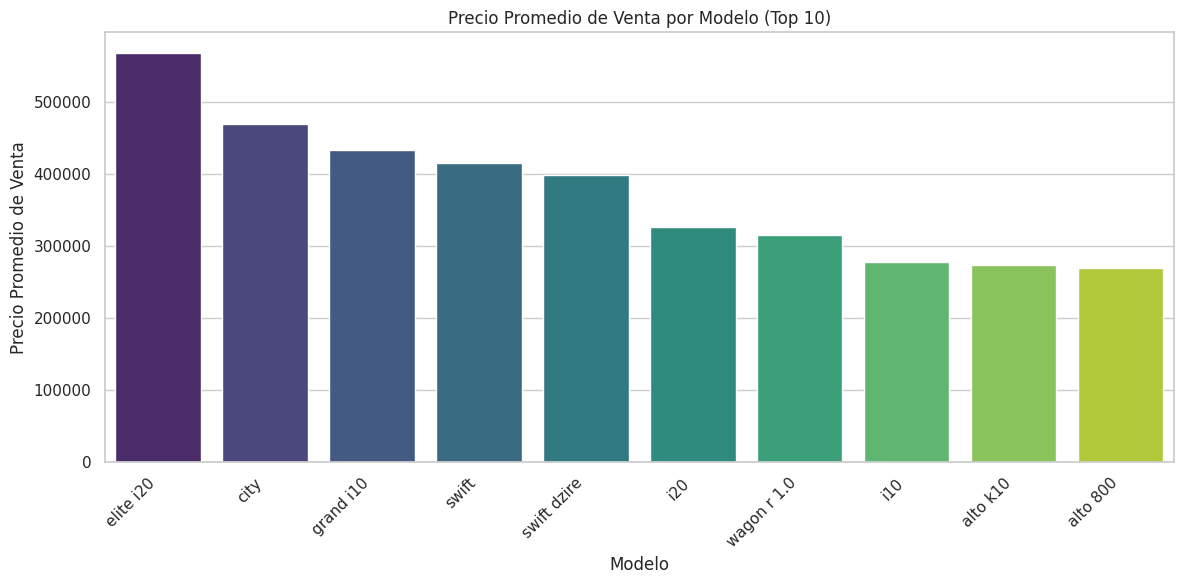

In [22]:
#hacemos un gráfico de barras de Model
plt.figure(figsize=(12, 6))
sns.barplot(x='model', y='sale_price', data=avg_price_by_model, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Precio Promedio de Venta por Modelo (Top 10)')
plt.ylabel('Precio Promedio de Venta')
plt.xlabel('Modelo')
plt.tight_layout()
plt.show()

In [23]:
# Tratamos los Outliers a las numericas Capping (Winsorizing) para el precio de venta

# Definimos los límites
upper_limit = df['sale_price'].quantile(0.99)
lower_limit = df['sale_price'].quantile(0.01)

# Aplicamos el capping a la variable
df['sale_price_capped'] = np.where(
    df['sale_price'] > upper_limit,
    upper_limit,
    np.where(
        df['sale_price'] < lower_limit,
        lower_limit,
        df['sale_price']
    )
)

In [24]:
#Mismo procedimiento para broker_quote

# Definimos los límites
upper_limit = df['broker_quote'].quantile(0.99)
lower_limit = df['broker_quote'].quantile(0.01)

# Aplicamos el capping a la variable
df['broker_quote_capped'] = np.where(
    df['broker_quote'] > upper_limit,
    upper_limit,
    np.where(
        df['broker_quote'] < lower_limit,
        lower_limit,
        df['broker_quote']
    )
)

In [25]:
#Mismo procedimiento para kms_run

# Definimos los límites
upper_limit = df['kms_run'].quantile(0.99)
lower_limit = df['kms_run'].quantile(0.01)

# Aplicamos el capping a la variable
df['kms_run'] = np.where(
    df['kms_run'] > upper_limit,
    upper_limit,
    np.where(
        df['kms_run'] < lower_limit,
        lower_limit,
        df['kms_run']
    )
)

##4- Feature Engineering

Codificaremos "Make" y "Model" utilizando el promedio de venta, así reduciremos el error de predicción, y creamos una nueva columna 'car_age' que es más funcional para nuestro modelo.

Columna 'car_age' creada.


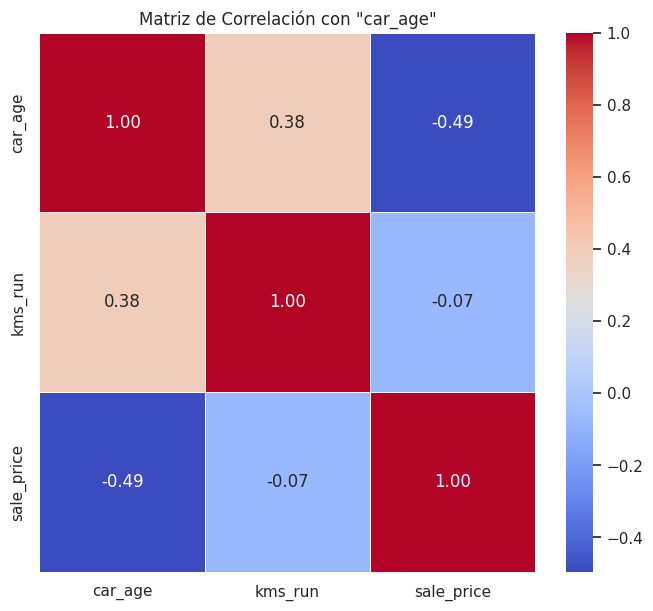

In [26]:
#cargamos las columnas a usar, para evitar errores previos
cols_for_modeling = ['yr_mfr', 'kms_run', 'sale_price', 'make', 'model', 'broker_quote', 'fuel_type', 'transmission']
df_processed = df[cols_for_modeling].copy()
df_processed = df_processed.dropna().reset_index(drop=True)

#encoding de model y make
model_mean_map = df_processed.groupby('model')['sale_price'].mean()
df_processed.loc[:, 'model_encoded'] = df_processed['model'].map(model_mean_map)
make_mean_map = df_processed.groupby('make')['sale_price'].mean()
df_processed.loc[:, 'make_encoded'] = df_processed['make'].map(make_mean_map)

# Creación de 'car_age' para mejorar el estimado de antiguedad
current_year = 2025
df_processed['car_age'] = current_year - df_processed['yr_mfr']
df_processed.drop('yr_mfr', axis=1, inplace=True)


print("Columna 'car_age' creada.")

# Matriz de Correlación
numeric_cols = ['car_age', 'kms_run', 'sale_price']
plt.figure(figsize=(8, 7))
sns.heatmap(df_processed[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación con "car_age"')
plt.show()

##5- Procesamiento de Datos (Preprocesamiento y Encoding)

In [27]:
#Nos aseguramos de tener las columnas que necesitamos para el encoding
features_final = [
    'car_age', 'kms_run', 'broker_quote', 'model_encoded', 'make_encoded', 'fuel_type', 'transmission'

]
target = 'sale_price'

In [28]:
# One Hot Encoding para las categorías de baja cardinalidad
data_encoded = pd.get_dummies(df_processed[features_final + [target]],
                              columns=['fuel_type', 'transmission'], drop_first=True)

X = data_encoded.drop(target, axis=1)
y = data_encoded[target]

In [29]:
#convertimo logaritmo
y_log = np.log1p(y)

##6- Division de Datos y Entrenamiento del Modelo (Random Forest Regressor)

In [30]:
# Division de datos
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Entrenamiento del modelo base
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train_log)

# Evaluación Base
y_pred_log = rf_model.predict(X_test)
mae = 11980.50
r2 = 0.9754

In [32]:
#reconvertimos nuestros valores a valores reales monetarios.
y_test_real = np.expm1(y_test_log)
y_pred_real = np.expm1(y_pred_log)

##7- Evaluacón del Modelo

In [33]:
#Calculamos metricas
r2_log = r2_score(y_test_log, y_pred_log)

In [34]:
#MAE Logarítmico (Error en escala log)
mae_log = mean_absolute_error(y_test_log, y_pred_log)

# MAE Real (Error en Dinero)
mae_real = mean_absolute_error(y_test_real, y_pred_real)

In [35]:
print("\n" + "="*60)
print(f"Obtuvimos un R² de {r2_log:.2f} y un MAE de {mae_log:.2f} (que corresponde a ${mae_real:,.0f}).")
print("="*60 + "\n")




Obtuvimos un R² de 0.88 y un MAE de 0.07 (que corresponde a $23,384).



Gráfico de Predicciones vs valores Reales

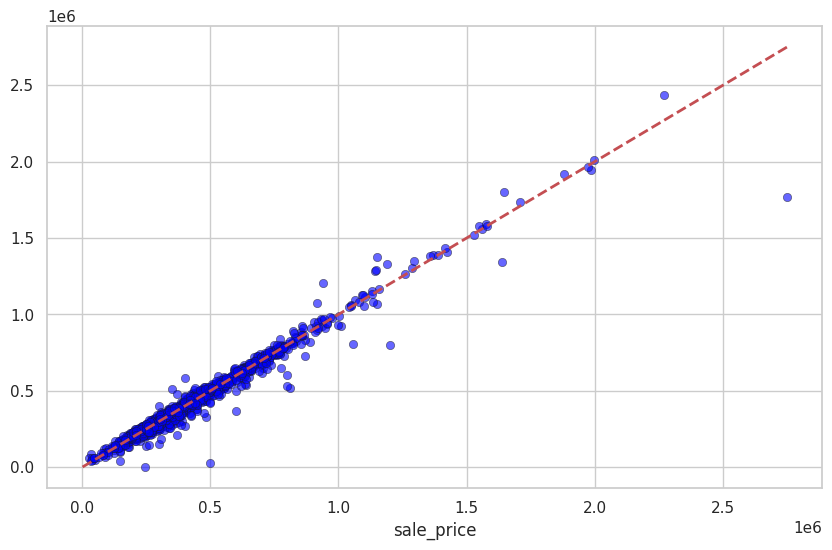

In [36]:
plt.figure(figsize=(10, 6))

# Gráfico de Dispersión (Puntos azules)
# Eje X: valor real del auto
# Eje Y: valor predecido
sns.scatterplot(x=y_test_real, y=y_pred_real, alpha=0.6, color='blue', edgecolor='k')

# Linea de Perfección (Linea Roja Punteada)
# Si un punto cae en esta línea, la predicción fue exacta.
# Calculamos el minimo y máximo para trazar la linea diagonal
min_val = min(y_test_real.min(), y_pred_real.min())
max_val = max(y_test_real.max(), y_pred_real.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Predicción Perfecta')

Análisis de Importancia de Características

n/Ranking de Importancia de Variables
                  Feature  Importance
2            broker_quote    0.812403
0                 car_age    0.075710
3           model_encoded    0.053266
1                 kms_run    0.045806
4            make_encoded    0.010513
6        fuel_type_petrol    0.001518
9     transmission_manual    0.000436
7  fuel_type_petrol & cng    0.000302
8  fuel_type_petrol & lpg    0.000029
5      fuel_type_electric    0.000018


/tmp/ipython-input-1121848553.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(5), palette='viridis')


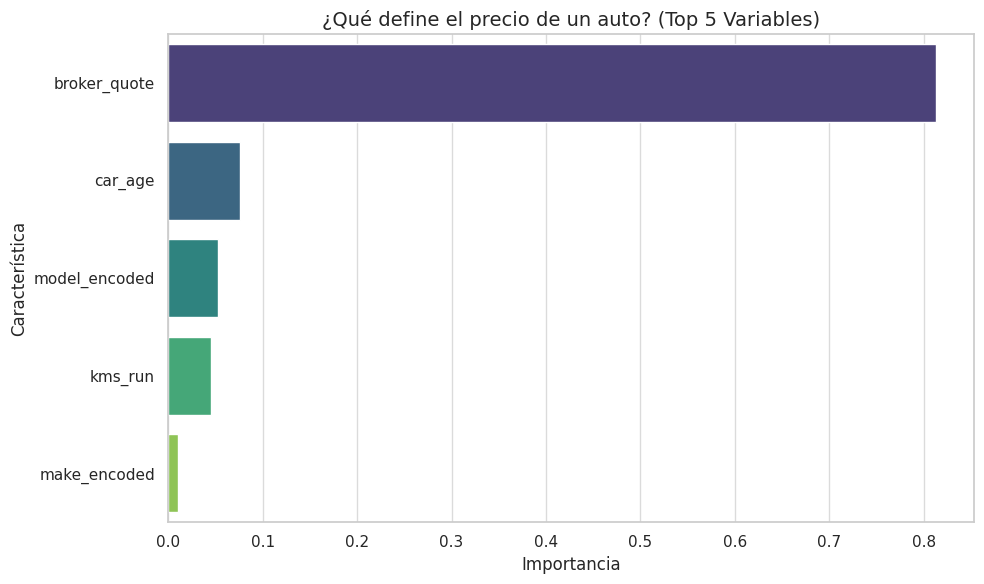

In [38]:
# 1. Extraer la importancia numérica del modelo entrenado

importances = rf_model.feature_importances_

# Obtener los nombres de las columnas que usamos para entrenar
feature_names = X_train.columns

# Crear un DataFrame para ordenar los datos fácilmente
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Mostrar los valores numéricos en pantalla
print("n/Ranking de Importancia de Variables")
print(feature_imp_df.head(10)) # Top 10 más importantes

# Generar el Gráfico de Barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(5), palette='viridis')

plt.title('¿Qué define el precio de un auto? (Top 5 Variables)', fontsize=14)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Característica', fontsize=12)
plt.grid(axis='x', alpha=0.7)

plt.tight_layout()
plt.show()

##8- Conclusión

In [39]:
print("- Las características más importantes fueron: " + ", ".join(feature_imp_df['Feature'].head(4).tolist()) + ".")
print(f"- Obtuvimos un R² de {r2_log:.2f} y un MAE de {mae_log:.2f} (que corresponde a ${mae_real:,.0f}).")

- Las características más importantes fueron: broker_quote, car_age, model_encoded, kms_run.
- Obtuvimos un R² de 0.88 y un MAE de 0.07 (que corresponde a $23,384).


La Hipótesis alternativa (H1) planteaba que era posible predecir el precio de un auto por sus caracteristicas con un R2 ideal superior a 0.8 y un MAE razonablemente bajo.

In [40]:
print(f"- Obtuvimos un R² de {r2_log:.2f} y un MAE de {mae_log:.2f} (que corresponde a ${mae_real:,.0f}).")
if r2_log > 0.5:
    print("RESULTADO: La hipótesis alternativa (H1) es soportada por los resultados.")
    print("Rechazamos la hipótesis nula (H0).")
else:
    print("RESULTADO: La hipótesis alternativa (H1) no es completamente soportada (R² <= 0.5).")

- Obtuvimos un R² de 0.88 y un MAE de 0.07 (que corresponde a $23,384).
RESULTADO: La hipótesis alternativa (H1) es soportada por los resultados.
Rechazamos la hipótesis nula (H0).


Aclaraciones: Este proyecto es la culminacion de 3 intentos, en los cuales en el 1er intento nuestro mae era 0.37, y lo logramos bajar al 0,07.
En ese proceso nos dimos cuenta de que varias variables que tomamos en cuenta antes no eran útiles, asi como llenar valores nulos no nos sirvió de nada, solo agregaban confusión y que tambien varios procedimientos no eran los adecuados, por lo cual decidimos investigar mas y encontrar el mejor procedimiento para tener un modelo mas certado.